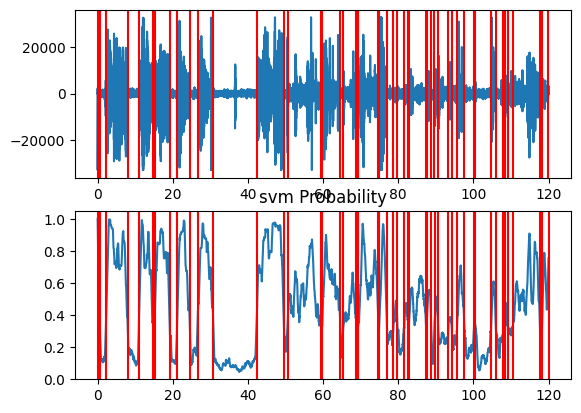

In [65]:
#import required libraries
import os
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
# path to audio file
file ='../assets/202402181903_one_channel_120sec.wav'

assert os.path.isfile(file)

# below method returns the active / non silent segments of the audio file 
[Fs, x] = aIO.read_audio_file(file)
segments = aS.silence_removal(x, 
                             Fs, 
                             0.020, 
                             0.020, 
                             smooth_window=1.0, 
                             weight=0.3, 
                             plot=True)

## Remove too short windows

In [69]:
MIN_LENGTH, MIN_INTERVAL = 3, 3
START, END = 0, 1
modified_segments = [segment for segment in segments if segment[END] - segment[START] > MIN_LENGTH]
print(segments, len(segments))
print(modified_segments, len(modified_segments))

combined_segments = [modified_segments[0][:]]
index = 1
while index < len(modified_segments):
    if modified_segments[index][START]-combined_segments[-1][END] > MIN_INTERVAL:
        combined_segments.append(modified_segments[index])
    else:
        combined_segments[-1][END] = modified_segments[index][END]
    index += 1

print(combined_segments, len(combined_segments))

[[0.0, 0.52], [2.22, 7.98], [10.98, 14.86], [15.16, 19.16], [21.14, 24.52], [26.580000000000002, 30.78], [42.300000000000004, 74.7], [50.54, 59.480000000000004], [59.78, 64.54], [65.4, 68.82000000000001], [68.94, 69.28], [69.34, 74.7], [74.94, 76.92], [78.72, 79.72], [81.60000000000001, 82.66], [82.82000000000001, 87.4], [87.56, 88.74], [89.64, 90.58], [93.34, 94.18], [95.66, 97.56], [100.14, 100.46000000000001], [104.74000000000001, 105.94], [107.96000000000001, 108.18], [108.42, 109.08], [110.5, 117.66], [118.26, 119.98]] 26
[[2.22, 7.98], [10.98, 14.86], [15.16, 19.16], [21.14, 24.52], [26.580000000000002, 30.78], [42.300000000000004, 74.7], [50.54, 59.480000000000004], [59.78, 64.54], [65.4, 68.82000000000001], [69.34, 74.7], [82.82000000000001, 87.4], [110.5, 117.66]] 12
[[2.22, 30.78], [42.300000000000004, 74.7], [82.82000000000001, 87.4], [110.5, 117.66]] 4


## Slice silent windows

In [27]:
from pydub import AudioSegment
myaudio = AudioSegment.from_wav(file)

In [70]:
if combined_segments:
    for index, segment in enumerate(combined_segments):
        extract = myaudio[segment[START]*1000:segment[END]*1000]
        extract.export(f'paa-extract-{index}.wav', format="wav")

## Create audio metadata

In [71]:
metadata = [{ 'start_sec': segment[0], 'end_sec': segment[1] } for segment in combined_segments]
print(metadata)

[{'start_sec': 2.22, 'end_sec': 30.78}, {'start_sec': 42.300000000000004, 'end_sec': 74.7}, {'start_sec': 82.82000000000001, 'end_sec': 87.4}, {'start_sec': 110.5, 'end_sec': 117.66}]


In [73]:
import json
json_object = json.dumps(metadata, indent=4)
 
# Writing to sample.json
with open("audio_metadata.json", "w") as outfile:
    outfile.write(json_object)